In [43]:
from visuals.visuals_util import visualize_pointcloud_eval, visualize_pointcloud_eval_three, visualize_pointcloud
import torch
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

In [22]:
input, noised_input, output = (torch.load(p, map_location=torch.device('cpu')).transpose(1, 2) for p in [f"eval-results/data-for-visualization/{name}" for name in ["global-refinement-input.pth", "global-refinement-noised-input.pth", "global-refinement-output.pth"]])
pvd_airplane = torch.load("pvd_output/airplane_pc_data.pth", map_location=torch.device('cpu'))

In [23]:
print(input.shape, noised_input.shape, output.shape, pvd_airplane.shape)

torch.Size([20, 2048, 3]) torch.Size([20, 2048, 3]) torch.Size([20, 2048, 3]) torch.Size([27, 2048, 3])


/var/folders/0k/mvfs15g90173v31nmz_k7f480000gn/T/ipykernel_23898/2427519374.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  visualize_pointcloud(input[6], show_axis=False).show()
/var/folders/0k/mvfs15g90173v31nmz_k7f480000gn/T/ipykernel_23898/2427519374.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  visualize_pointcloud(output[6], show_axis=False).show()


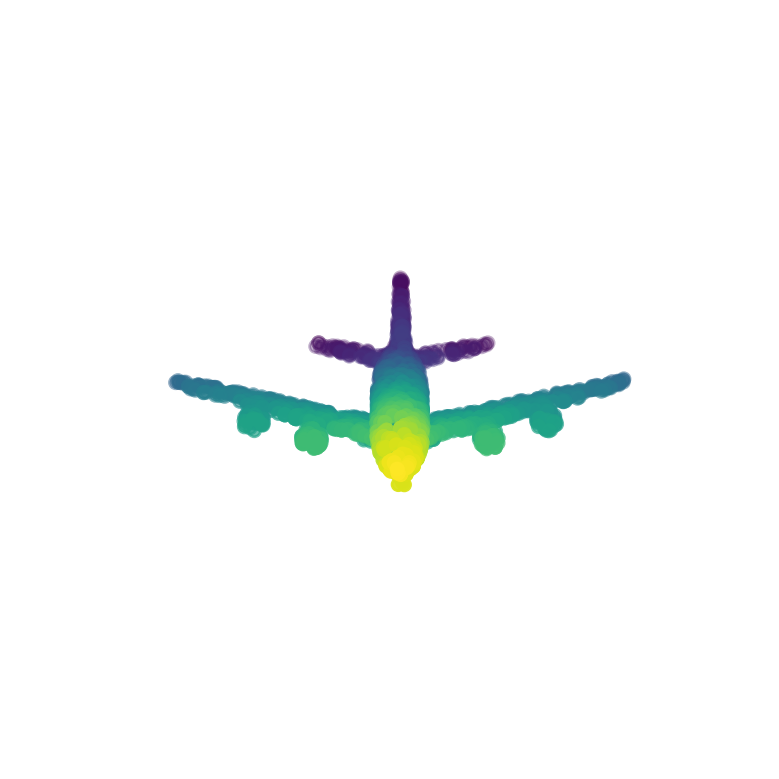

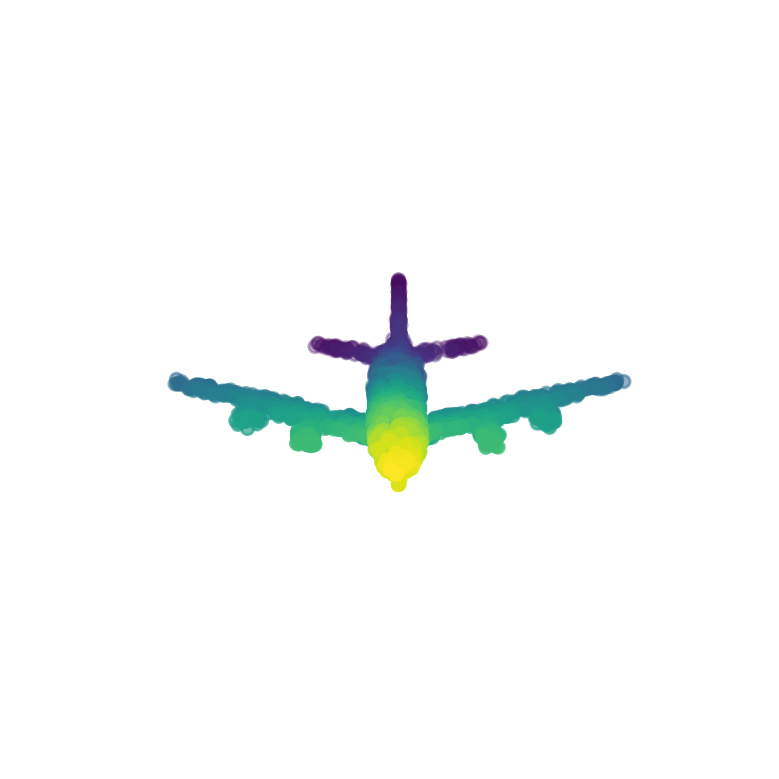

In [36]:
batch_index = 0
visualize_pointcloud(input[6], show_axis=False).show()
visualize_pointcloud(output[6], show_axis=False).show()
# visualize_pointcloud(noised_input[batch_index])

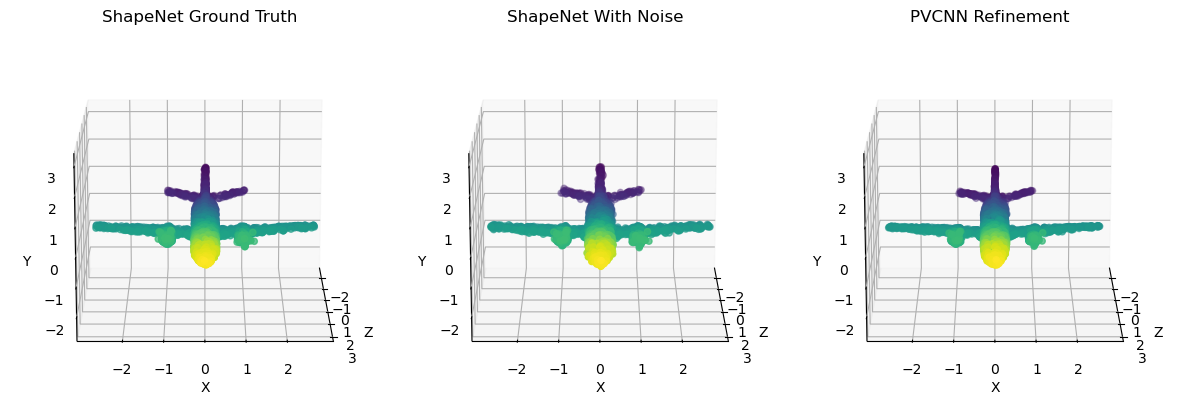

In [18]:
fig = visualize_pointcloud_eval_three(input[batch_index], noised_input[batch_index], output[batch_index], title1="ShapeNet Ground Truth", title2="ShapeNet With Noise", title3="PVCNN Refinement")
fig.savefig("visuals/global-refinement.png", dpi=400)

In [37]:
pr_input = torch.load("eval-results/data-for-visualization/patched-refinement-input.pth", map_location=torch.device('cpu'))

In [38]:
print(pr_input.shape)

torch.Size([20, 4, 512, 3])


In [ ]:
def side_by_side_figures(figs):
    fig, axs = plt.subplots(1, len(figs))
    for i, f in enumerate(figs):
        axs[i].imshow(f)
        axs[i].set_axis_off()
    return fig

/var/folders/0k/mvfs15g90173v31nmz_k7f480000gn/T/ipykernel_23898/3132137715.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  visualize_pointcloud(input[0]).show()
/var/folders/0k/mvfs15g90173v31nmz_k7f480000gn/T/ipykernel_23898/3132137715.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  visualize_pointcloud(pc, axis_ranges=[[-3, 3] for _ in range(3)]).show()


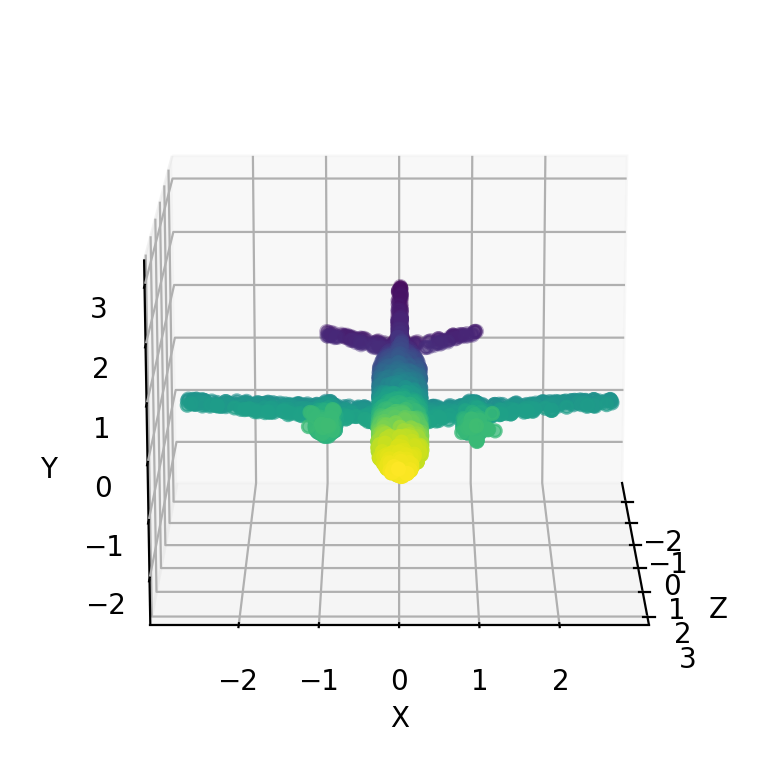

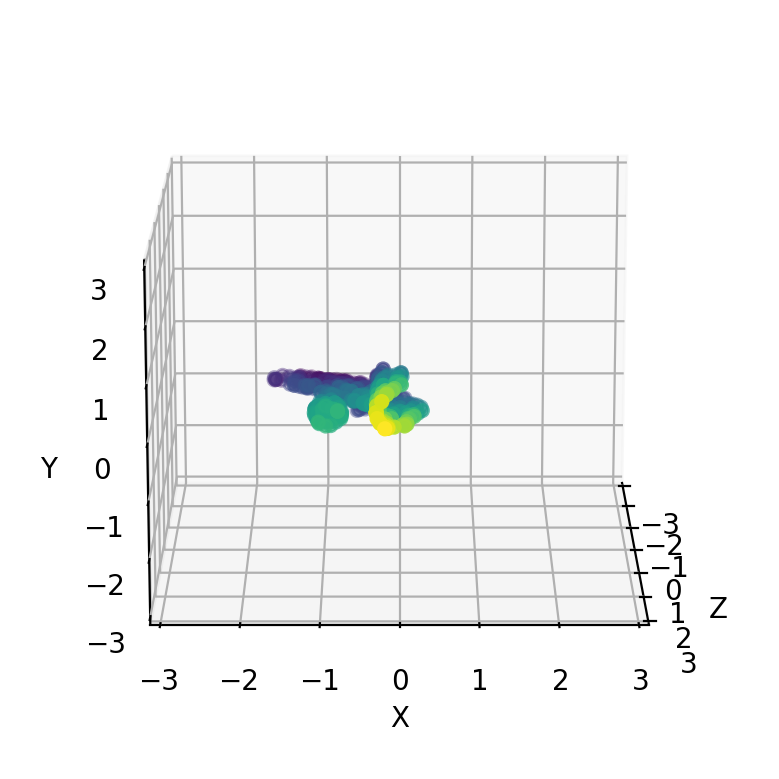

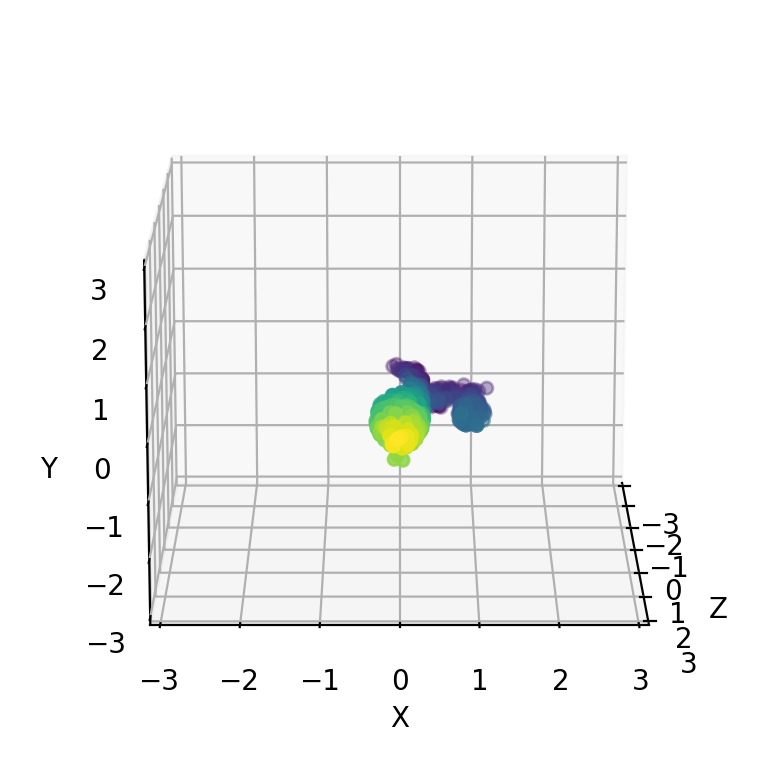

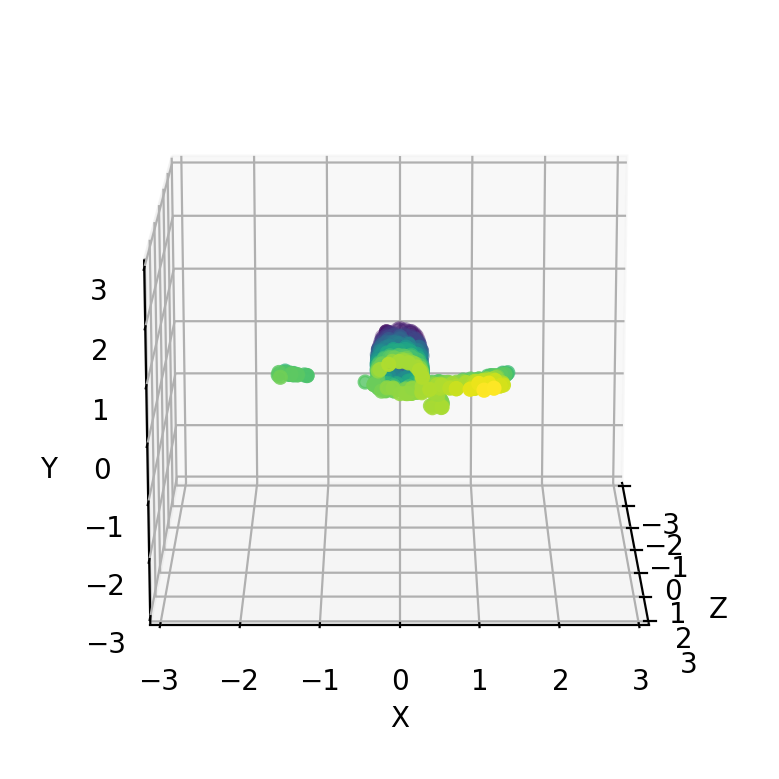

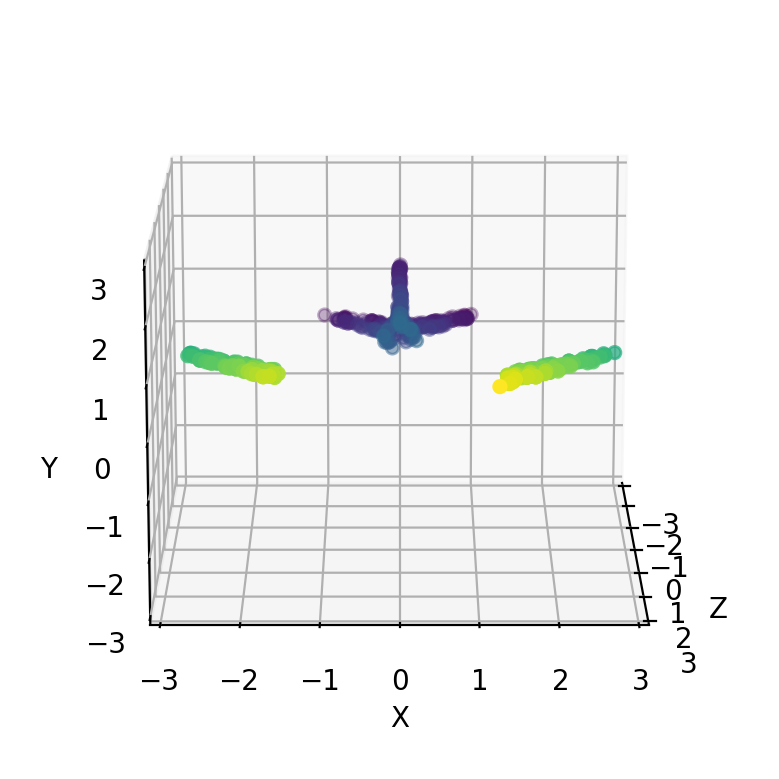

In [46]:
index = 0
visualize_pointcloud(input[0]).show()
for index, pc in enumerate(pr_input[0]):
    visualize_pointcloud(pc, axis_ranges=[[-3, 3] for _ in range(3)]).show()